TASK 1

Read in Mixcancer.csv

In [122]:
# imports 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def load_dataset():
    # Read in the .csv file and split at 0.5 train test
    data_frame = pd.read_csv('Mixcancer.csv')
    data = data_frame.to_numpy()
    
    x = data[:,1:]
    y = data[:,0]

    # Split the data ratio of 0.5 train / test
    sample_size = x.shape[0]
    train_indices = np.random.choice(range(sample_size), int(sample_size / 2), replace=False)
    selection_mask = np.zeros(sample_size, dtype=bool)
    selection_mask[train_indices] = True

    x_train = x[selection_mask]
    y_train = y[selection_mask]

    x_test = x[~selection_mask]
    y_test = y[~selection_mask]

    return x_train, y_train, x_test, y_test

In [124]:

class ANN:
    def __init__(self, batch_size=128, learning_rate=0.01, epochs=500):
        # Hyper parameters
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # For curve plotting
        self.loss_history = []

    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x)*(1.0-self.sigmoid(x))

    def cross_entropy(self, x, y):
        return (-y*(np.log(x)) - (1-y) * np.log(1-x))

    def cross_entropy_derivative(self, x, y):
        return -(y/x - (1-y)/(1-x))

    def train(self, x_train, y_train):
        # Initialize weights and bias
        self.w1 = np.random.uniform(-1.0, 1.0, (x_train.shape[1], 5))
        self.b1 = np.zeros((1, 5))
        self.w2 = np.random.uniform(-1.0, 1.0, (5, 1))
        self.b2 = 0

        for epoch in range(1, self.epochs + 1):
            if epoch % 10 == 0:
                print("Running epoch {}".format(epoch))
            # Select a 128 batch of samples
            batch_indices = np.random.randint(0, x_train.shape[0], self.batch_size)
            x_train_batch = np.array(x_train[batch_indices])
            y_train_batch = np.array(y_train[batch_indices])

            epoch_loss = 0
            for i in range(self.batch_size):
                x = x_train_batch[i]
                y = y_train_batch[i]
                
                # Feed forward
                inL1 = x@self.w1 + self.b1
                outL1 = self.sigmoid(inL1)
                inL2 = outL1@self.w2 + self.b2
                outL2 = self.sigmoid(inL2)

                #Error calulation
                e = 0.5*np.power(y-outL2, 2)

                #Loss
                loss = self.cross_entropy(outL2, y)
                epoch_loss += loss.mean()

                # Backpropagation layer 2
                dEdOutL2 = outL2 - y
                dOutL2dInL2 = self.sigmoid_derivative(inL2)
                dInL2dW2 = outL1
                dEdW2 = outL1.T*dEdOutL2*dOutL2dInL2
                dEdB2 = dEdOutL2*dOutL2dInL2

                #Backpropagation layer 1
                dInL2dOutL1 = self.w2
                dOutL1dInL1 = self.sigmoid_derivative(inL1)
                dInL1dW1 = x

                dEdW1 = dInL1dW1.reshape([len(dInL1dW1),1])@(dEdOutL2*dOutL2dInL2*dInL2dOutL1.T)*dOutL1dInL1
                dEdB1 = (dEdOutL2*dOutL2dInL2*dInL2dOutL1.T)*dOutL1dInL1

                # Updating parameters
                self.w1 -= self.learning_rate * dEdW1
                self.b1 -= self.learning_rate * dEdB1
                self.w2 -= self.learning_rate * dEdW2
                self.b2 -= self.learning_rate * dEdB2

            self.loss_history.append(epoch_loss)

        graph = np.array(self.loss_history)
        print(graph.shape)
        plt.plot(range(graph.shape[0]), graph)
        plt.show()

    def evaluate(self, x_test, y_test):
        pass


C:\Users\Robert\AppData\Local\Temp\ipykernel_12440\2911427427.py:12: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-x))


Running epoch 10
Running epoch 20
Running epoch 30
Running epoch 40
Running epoch 50
Running epoch 60
Running epoch 70
Running epoch 80
Running epoch 90
Running epoch 100
Running epoch 110
Running epoch 120
Running epoch 130
Running epoch 140
Running epoch 150
Running epoch 160
Running epoch 170
Running epoch 180
Running epoch 190
Running epoch 200
Running epoch 210
Running epoch 220
Running epoch 230
Running epoch 240
Running epoch 250
Running epoch 260
Running epoch 270
Running epoch 280
Running epoch 290
Running epoch 300
Running epoch 310
Running epoch 320
Running epoch 330
Running epoch 340
Running epoch 350
Running epoch 360
Running epoch 370
Running epoch 380
Running epoch 390
Running epoch 400
Running epoch 410
Running epoch 420
Running epoch 430
Running epoch 440
Running epoch 450
Running epoch 460
Running epoch 470
Running epoch 480
Running epoch 490
Running epoch 500
(500,)


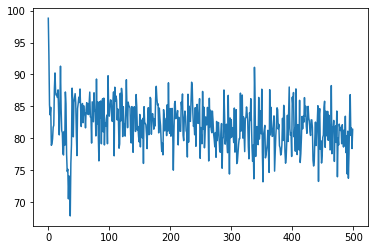

In [125]:
def main():
    x_train, y_train, x_test, y_test = load_dataset()

    ann = ANN(batch_size=128, learning_rate=0.01, epochs=500)

    ann.train(x_train, y_train)

    
    

main()